<h1 align="center" ><i style="font-size:larger"> Analytics and Predictive Modeling </i> <br/> Final Exam Assignment </h1>

Complete the tasks in this notebook.  **SAVE FREQUENTLY!!!!**  Then download and submit the entire notebook. 

We'll need the following imports throughout this final assignment.

In [35]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [381]:
from pandas import read_csv, DataFrame, crosstab

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
import neurolab

ln = log  

Also, let's load the assignment routines and data for this unit.  Enter your username and then execute the line 

**%run -i FinalExam.py**

<b style="font-size:larger">NOTE:</b> This notebook was zipped along with <b>HeartData.csv, leukemia.csv, </b> and <b>FinalExam.py</b>.  They must be uploaded into the same folder as this notebook!

In [3]:
username = "siameh" #"Replace with Your Username"

In [4]:
%run -i FinalExam.py

#Review/Comparison of the Classifiers

The logistic model accomplishes much of what we hoped for -- a linear classifier based on maximum entropy. If the data is separable, then it is -- not surprisingly -- the best in some sense (i.e., with respect to maximum entropy modeling).  

If the data is not linearly separable -- or if we don't know whether or not the data is linearly separable -- then neural networks have the feature that they will reduce to linear if the underlying data truly is linearly separable but will provide a highly reliable classifier otherwise.  

We will also compare to two other methods that do not require linear separability of the original data.

  * **Support Vector Machines:** Data is first embedded into a high dimensional space and then a linear classifier is applied. 
        
  * **Random Forests:** A bootstrap resampling of randomly generated decision trees -- that is, an "ensemble" of randomly generated decision trees that via sampling with replacement is used to imply a single classifier.  

Let's get started.  You will need to complete each **task** in this notebook.  

## Revisiting the Iris

We've seen Fisher's classic Iris data before, but let's look at it again -- this time with an array of classifiers.  

In [483]:
iris = datasets.load_iris()

In [484]:
iris.data.shape

(150, 4)

In [485]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [486]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [487]:
X = array( [iris.data[:,0], iris.data[:,2]] ).T  # Sepal Length and Petal Length
Y = iris.target

First we look at Logistic Regression. 

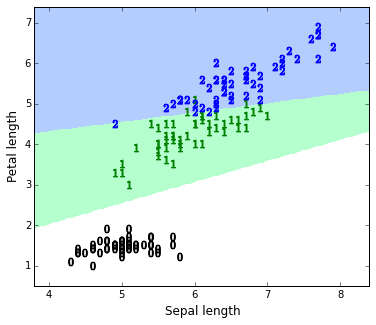

In [488]:
classifier = LogisticRegression(C=1e5)

classifier.fit(X, Y)

DecisionBoundary(X,classifier.predict)

Next, we look at a Support Vector Machine. 

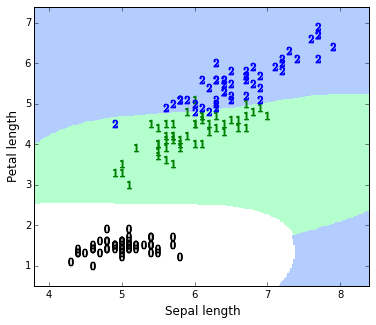

In [90]:
SVMclassifier = SVC()

SVMclassifier.fit(X,Y)

DecisionBoundary(X,SVMclassifier.predict)

**Question 1: (answer in the space below)**  Why did the Support vector machine not produce linear decision boundaries? 

Next, two instances of a random forest -- just so you will see how they still have the same type of instability that decision trees have. 

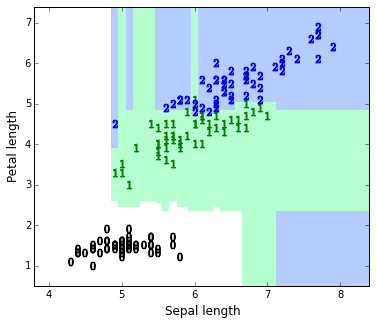

In [41]:
RFclassifier = RandomForestClassifier()

RFclassifier.fit(X,Y)

DecisionBoundary(X,RFclassifier.predict)

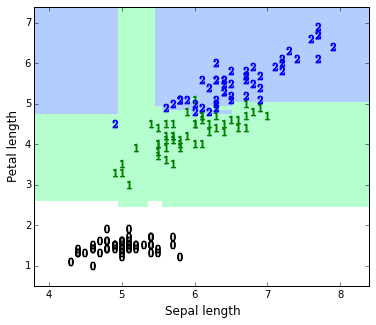

In [42]:
RFclassifier = RandomForestClassifier()

RFclassifier.fit(X,Y)

DecisionBoundary(X,RFclassifier.predict)

Let's not forget about the nearest neighbor classifiers!  They are great, can be rewired, and have fantastic modeling properties. 

But they lack the theory necessary to manage them (i.e., if we knew more about the types of networks that nearest neighbor methods are producing, then nearest neighbor methods might have been the only things we looked at!)

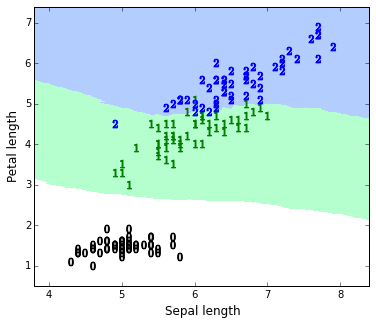

In [88]:
kNNclassifier = KNeighborsClassifier( n_neighbors = 15)

kNNclassifier.fit(X,Y)

DecisionBoundary(X,kNNclassifier.predict)

**Question 2:** What happens as *k* becomes larger?  A better classifier?? or worse?? Or about the same??  Closer to linear?? 

Finally, let's look at the neural networks.  

<b style="font-size:larger">NOTE: Pybrain or Keros or Caffe or Torch are the preferred libraries, but they have a significant learning curve.  I chose neurolab because it is easy to learn quickly (but not very strong)
<h4 align='center'>AND</h4>
<br/>
because it allows the Vanishing Gradient problem (I.E., YOU WILL ALMOST CERTAINLY HAVE TO RESTART SOME CELLS IN ORDER TO EVENTUALLY GET RESULTS</b>

In [67]:
ANN = neurolab.net.newff([[4,8],[1,7]], [2,5,3])
ANN.trainf = neurolab.train.train_cg 

Our output layer has 3 neurons -- one for class 0, one for class 1, and one for class 2.  Thus, an output like [1,0,0]  implies class 0, while an output [0,0,1]  implies class 2.  

The procedures below translate the data to/from this 3 output node arrangement.  

In [68]:
Y4ANN = zeros( (len(Y),3) )
for i in range(len(Y)):
    Y4ANN[i,Y[i]] = 1
    
def ANNpred(Data):
    Results = ANN.sim(Data)
    nrw,ncl = Results.shape
    pred = zeros(nrw)
    for i in range(nrw):
        for j in range(3):
            if( Results[i,j] > 0.5):
                pred[i] = j
                break
    return pred

May need to repeat the next cell several times. 

<b style="font-size:larger">NOTE: If training stops suddenly or stops on an error well above 0, then it is because of the vanishing gradient problem. For now, simply run the cell below again.  May have to do so several times. </b> 

Epoch: 50; Error: 208.252549494;
Epoch: 100; Error: 178.491868854;
Epoch: 150; Error: 37.4026500362;
Epoch: 200; Error: 25.0131685548;
Epoch: 250; Error: 24.742458719;
Epoch: 300; Error: 23.8646677926;
Epoch: 350; Error: 14.1340328551;
Epoch: 400; Error: 8.6945798379;
Epoch: 450; Error: 7.14220873429;
Epoch: 500; Error: 6.7821200865;
Epoch: 550; Error: 6.51118691959;
Epoch: 600; Error: 6.20645769775;
Epoch: 650; Error: 6.01450282819;
Epoch: 700; Error: 5.91184271138;
Epoch: 750; Error: 5.84959944549;
Epoch: 800; Error: 5.78175871443;
Epoch: 850; Error: 5.67035329558;
Epoch: 900; Error: 5.58462101021;
Epoch: 950; Error: 5.54096104212;
Epoch: 1000; Error: 5.34898709779;
Epoch: 1050; Error: 5.2961067376;
Epoch: 1100; Error: 5.1730755287;
Epoch: 1150; Error: 5.12311651008;
Epoch: 1200; Error: 4.93823670293;
Epoch: 1250; Error: 4.61076872688;
Epoch: 1300; Error: 4.56020833739;
Epoch: 1350; Error: 4.50233700119;
Epoch: 1400; Error: 4.4741990693;
Epoch: 1450; Error: 4.42827816349;
Epoch: 1500

3.9846696711753919

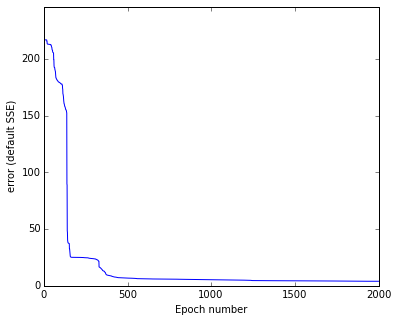

In [83]:
ANN.init() 
err = []

err.extend(  ANN.train(X, Y4ANN, show = 50, epochs=2000 ) )

plot(err)
ylim(0,max(err))
xlabel('Epoch number')
ylabel('error (default SSE)')
err[-1]

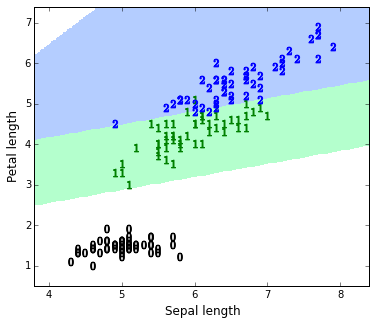

In [84]:
DecisionBoundary(X,ANNpred)

The neural network will (eventually) be the best, but it will also take the most work to get there. 

**Question 3:** Which of the classifiers above does the ANN most closely resemble? 

<p>&nbsp;</p>

## Heart Disease Diagnostic Dataset -- Disease versus No Disease

Here we look at a diagnostic test for heart disease.  There are 11 variables,  

 * age, sex, cp=chest pain, restbps = resting blood pressure, chol = cholestoral in mg/dl, fbs = fasting blood sugur, restecg (0=normal, 1 = ST-T abnormality, 2 = Probable ventricular hypertrophy), thalach = max heart rate, exang = exercise induced angina, thal=thalium heart scan, and num = class of the heart disease

Let's load the data and take a look. 


In [121]:
HeartDisease = loadtxt('HeartDisease.csv', delimiter="," )
DataFrame(HeartDisease, columns=['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'num']).head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,1,145,233,1,2,150,0,2.3,0
1,67,1,4,160,286,0,2,108,1,1.5,1
2,67,1,4,120,229,0,2,129,1,2.6,1
3,37,1,3,130,250,0,0,187,0,3.5,0
4,41,0,2,130,204,0,2,172,0,1.4,0


Immediately, we see a problem.  Some columns are only 0 and 1, while other columns are numerical.  

For a linear classifier (no embedding into higher dimensions), this is not an issue because the coefficients can do the appropriate scaling, as we shall soon see.   

First however, let's split the data into Training and Testing sets. 

In [171]:
TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(HeartDisease[:,:10],HeartDisease[:,10], test_size = 0.2 )

In [172]:
TrainingPatterns

array([[  58. ,    0. ,    4. , ...,  146. ,    1. ,    2.8],
       [  65. ,    0. ,    3. , ...,  151. ,    0. ,    0.8],
       [  49. ,    1. ,    2. , ...,  171. ,    0. ,    0.6],
       ..., 
       [  51. ,    1. ,    1. , ...,  125. ,    1. ,    1.4],
       [  61. ,    0. ,    4. , ...,  146. ,    1. ,    1. ],
       [  53. ,    1. ,    4. , ...,   95. ,    1. ,    2. ]])

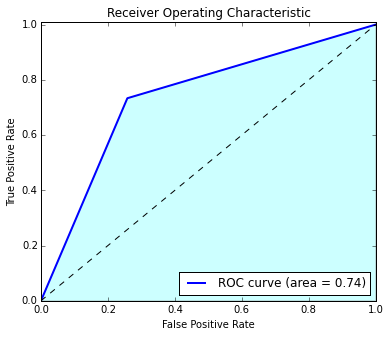

((0, 0), 0)

In [195]:
classifier = LogisticRegression(C=1000)

classifier.fit(TrainingPatterns,TrainingTargets)


Predictions = classifier.predict(TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr,tpr, auc = True )

However, anything which addresses nonlinearity is going to be corrupted by the relative sizes of the individual features. 

For example, a support vector machine should perform at least as well or better than logistic regression. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


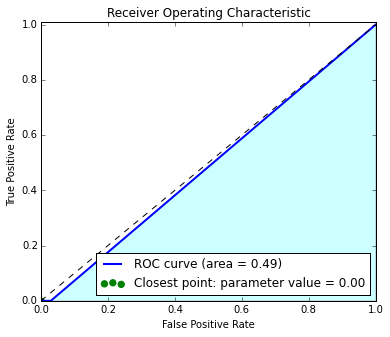

((0, 0), 0)

In [174]:
SVMclassifier = SVC()

SVMclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = SVMclassifier.predict( TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

The poor performance is because of the relative magnitudes of the data set.  

Thus, we first employ a **preprocessing** step.  In particular, we scale the data so that each feature (column) is between 0 and 1, inclusive. 

In [175]:
min_max_scaler = preprocessing.MinMaxScaler()
HeartDiseaseRescaled = min_max_scaler.fit_transform( HeartDisease )
View(HeartDiseaseRescaled)

0.70833,1.0,0.0,0.48113,0.24429,1.0,1.0,0.60305,0.0,0.37097,0.0
0.79167,1.0,1.0,0.62264,0.3653,0.0,1.0,0.28244,1.0,0.24194,1.0
0.79167,1.0,1.0,0.24528,0.23516,0.0,1.0,0.44275,1.0,0.41935,1.0
0.16667,1.0,0.66667,0.33962,0.28311,0.0,0.0,0.8855,0.0,0.56452,0.0
0.25,0.0,0.33333,0.33962,0.17808,0.0,1.0,0.77099,0.0,0.22581,0.0
0.5625,1.0,0.33333,0.24528,0.25114,0.0,0.0,0.81679,0.0,0.12903,0.0
0.6875,0.0,1.0,0.43396,0.3242,0.0,1.0,0.67939,0.0,0.58065,1.0
0.58333,0.0,1.0,0.24528,0.52055,0.0,0.0,0.70229,1.0,0.09677,0.0
0.70833,1.0,1.0,0.33962,0.29224,0.0,1.0,0.58015,0.0,0.22581,1.0
0.5,1.0,1.0,0.43396,0.1758,1.0,1.0,0.64122,1.0,0.5,1.0
0.58333,1.0,1.0,0.43396,0.15068,0.0,0.0,0.58779,0.0,0.06452,0.0


We re-partition the data.  

In [176]:
TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(HeartDiseaseRescaled[:,:10],HeartDiseaseRescaled[:,10], test_size = 0.2 )

In [177]:
TrainingPatterns

array([[ 0.25      ,  0.        ,  0.66666667, ...,  0.77099237,
         1.        ,  0.        ],
       [ 0.6875    ,  0.        ,  1.        , ...,  0.26717557,
         0.        ,  0.30645161],
       [ 0.58333333,  1.        ,  0.66666667, ...,  0.60305344,
         0.        ,  0.06451613],
       ..., 
       [ 0.3125    ,  1.        ,  0.33333333, ...,  0.77862595,
         0.        ,  0.        ],
       [ 0.625     ,  1.        ,  1.        , ...,  0.54198473,
         1.        ,  0.19354839],
       [ 0.85416667,  1.        ,  0.33333333, ...,  0.54961832,
         0.        ,  0.        ]])

**Question 4:** How are the **TrainingPatterns** just produced any different than the ones earlier? 

We start -- again -- with Logistic Regression

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


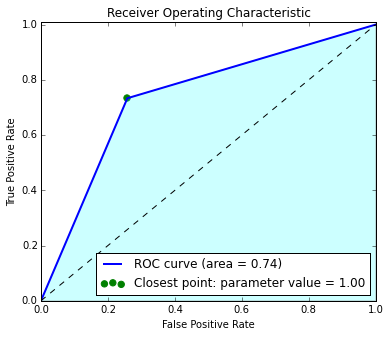

((0.25806451612903225, 0.73333333333333328), 1.0)

In [178]:
classifier = LogisticRegression(C=1000)

classifier.fit(TrainingPatterns,TrainingTargets)


Predictions = classifier.predict(TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr,tpr, True, threshholds )

Now let's look at the support vector machine again. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


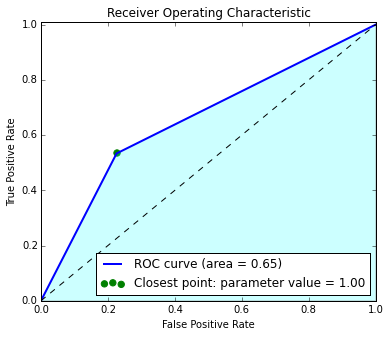

((0.22580645161290322, 0.53333333333333333), 1.0)

In [209]:
SVMclassifier = SVC()

F = SVMclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = SVMclassifier.predict( TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

and the random forest... 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


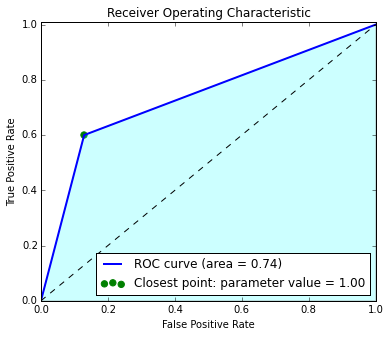

((0.12903225806451613, 0.59999999999999998), 1.0)

In [180]:
RFclassifier = RandomForestClassifier()

RFclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = RFclassifier.predict( TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

Finally, we finish up with a neural network -- 

In [181]:
ANN = neurolab.net.newff([[0,1] for i in range(10)], [10, 10, 1])
ANN.trainf = neurolab.train.train_cg
ANN.init()
err = []


Not sure how many times you will need to run the command below, but only 2 or 3 should be plenty. However, <b style="font-size:larger">if the vanishing gradient problem shows up,</b> you will have to reinitialize the network (cell above) and then execute this again. 

Epoch: 50; Error: 10.5251417321;
Epoch: 100; Error: 7.48878786397;
Epoch: 150; Error: 6.27574776836;
Epoch: 200; Error: 5.32010680133;
Epoch: 250; Error: 4.84571338206;
Epoch: 300; Error: 4.5462139253;
Epoch: 350; Error: 3.57672392616;
Epoch: 400; Error: 3.35852887965;
Epoch: 450; Error: 2.97930261921;
Epoch: 500; Error: 2.65600365515;
The maximum number of train epochs is reached


2.6560036551490276

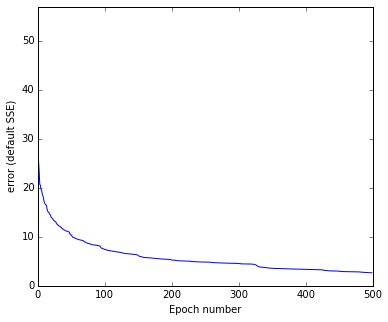

In [182]:
err.extend( ANN.train(TrainingPatterns, TrainingTargets.reshape( (len(TrainingTargets),1) ), show = 50 ) )

plot(err)
ylim(0,max(err))
xlabel('Epoch number')
ylabel('error (default SSE)')
err[-1]

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


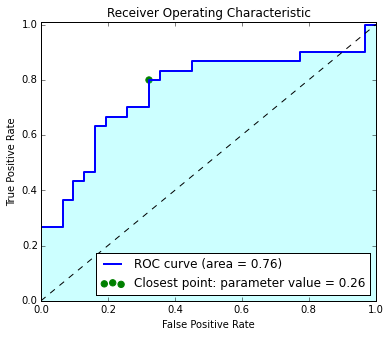

((0.32258064516129031, 0.80000000000000004), 0.25772236239876634)

In [202]:
Predictions = ANN.sim(TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)
ac =auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

**Question 5:** What is the ROC curve above telling us?  Comment about (a) what part of the data it is applied to, (b) the area under the curve, and (c) (VERY IMPORTANT) the value of "Closest point: parameter value", because it indicates overfitting in some of these classifiers (Why?).  

<p>&nbsp;</p>


## The Leukemia Microarray Data set

Suppose now that we look at a fairly typical application of Machine learning in Big Data -- that of studying the genetic causes of disease.  Our goal in this case is 

**feature detection:** Determining which features (genes) are most responsible for a macroscopic phenomenon (e.g., disease).  Samples (biopsies) are collected from both a disease-free control group and a disease-expressing experimental group.  The samples are used to produce *micro-arrays*, which are arrays that measure how much a gene is being expressed in the sample (e.g., measuring relative amounts of RNA corresponding to the DNA of the gene).  
    
The data we will look at is for leukemia. There are activity levels for 7129 genes from a total of 72 samples.  Moreover, the data has been preprocessed so that each genes' activity has a mean of 0 and a standard deviation of 1 across the entire experimental and control groups.  This is known as "Standardization" of the data. 

In [220]:
StandardizedLeukemiaData   = loadtxt('leukemiaALL.csv',delimiter = ",")

TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(StandardizedLeukemiaData[:,1:],StandardizedLeukemiaData[:,0], test_size = 0.2 )

NumTrain, NumberOfGenes =  TrainingPatterns.shape
NumTest , NumberOfGenes =  TestingPatterns.shape
NumberOfGenes

7129

In [219]:
StandardizedLeukemiaData   = loadtxt('leukemiaALL.csv',delimiter = ",")
StandardizedLeukemiaData.shape

(72, 7130)

Here are some plots of individual samples genetic expressions.  

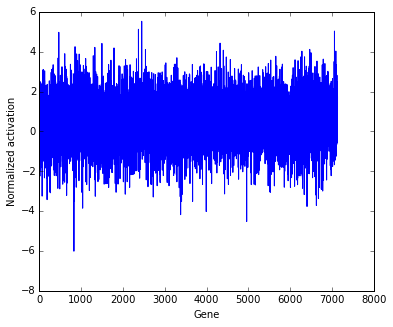

In [224]:
plot( TrainingPatterns[0] )
xlabel( 'Gene' )
ylabel( 'Normalized activation' )

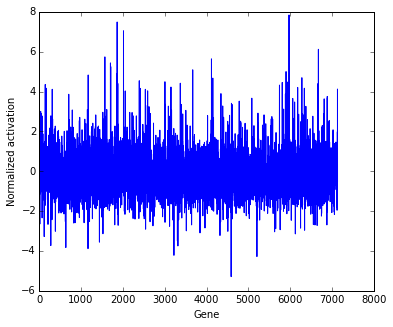

In [225]:
plot( TrainingPatterns[1] )
xlabel( 'Gene' )
ylabel( 'Normalized activation' )

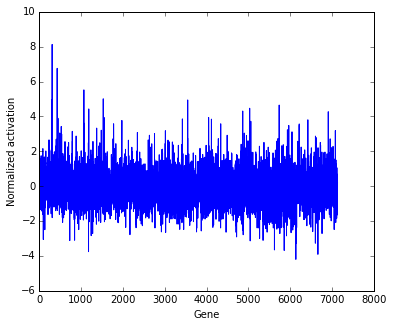

In [226]:
plot( TrainingPatterns[2] )
xlabel( 'Gene' )
ylabel( 'Normalized activation' )

Logistic Regression is the workhorse!! We always start with it. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


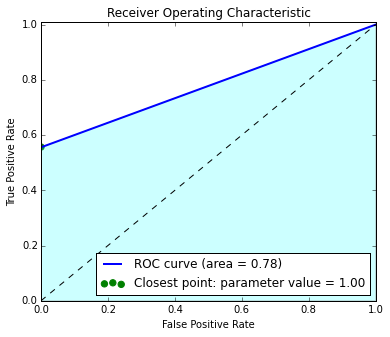

((0.0, 0.55555555555555558), 1.0)

In [227]:
classifier = LogisticRegression(C=1000)

classifier.fit(TrainingPatterns,TrainingTargets)


Predictions = classifier.predict(TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr, tpr, True, threshholds)

In fact, linear in a sufficiently high dimensional context has great potential because of the massive independence of genes from one another -- a gene responsible for metabolism is relatively independent of a gene responsible for eye color, for example.  

So let's try out an SVM. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


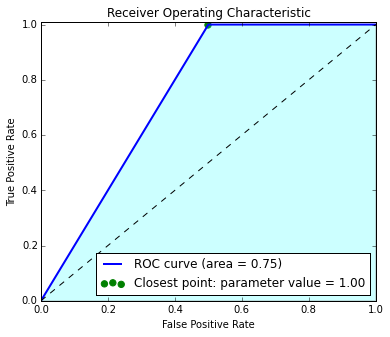

((0.5, 1.0), 1.0)

In [228]:
SVMclassifier = SVC( )

SVMclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = SVMclassifier.predict( TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr, tpr, True, threshholds)

And a random forest, if only for completeness. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


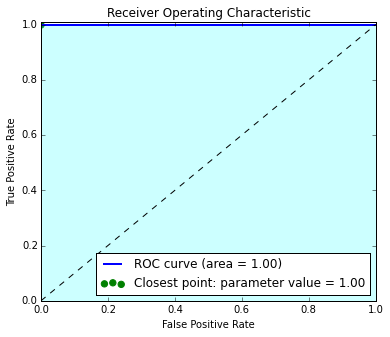

((0.0, 1.0), 1.0)

In [229]:
RFclassifier = RandomForestClassifier()

RFclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = RFclassifier.predict( TestingPatterns)
Predictions

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr, tpr, True, threshholds)

In particular, the standardization of the data -- while highly necessary -- produces features with different magnitude.  We can reduce the impact of the standardization by using an SVM with a **<i>linear kernel</i>**, because linearity allows rescaling of the coefficients to compensate for different scales of the features. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


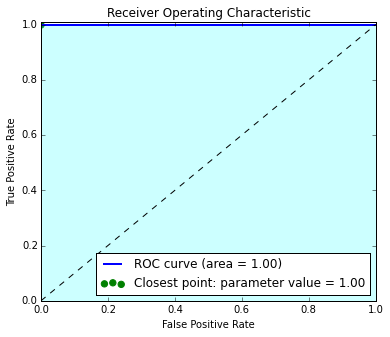

((0.0, 1.0), 1.0)

In [263]:
SVMclassifier = SVC( kernel = 'linear' )

SVMclassifier.fit(TrainingPatterns,TrainingTargets)

Predictions = SVMclassifier.predict( TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

ROCplot(fpr, tpr, True, threshholds)

Unfortunately, we do not have many observations, so the ROC and AUC can vary greatly from one random training - testing subdivision to the next.  Consequently, we need to use other metrics as well. For example, here is the **<i>precision-recall curve</i>**. 

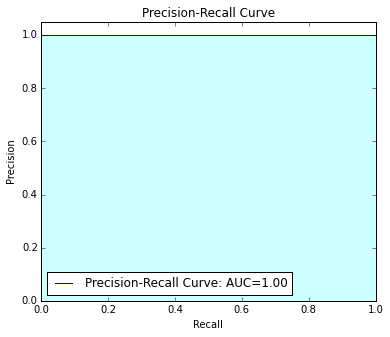

In [264]:
precision, recall, threshold = precision_recall_curve(TestingTargets, Predictions)
PRCplot(recall, precision, auc=True)

The support vector machine is not only probably the best for this example, but it also gives us a bonus -- Support Vectors!!.  We label these as **SupportData**, which we can obtain from either the property **support_vectors_** of our classifier object, or from the indices corresponding to the support vectors, which are the property **support_**  of the classifier object. 

In [265]:
SupportIndices = SVMclassifier.support_
SupportData    = TrainingPatterns[ SVMclassifier.support_ ]
SupportTargets = TrainingTargets[  SVMclassifier.support_ ]

SupportIndices

array([ 4,  7,  8, 10, 14, 16, 18, 21, 26, 29, 33, 42, 44, 49, 53, 54,  1,
        2,  5,  9, 12, 19, 20, 27, 28, 31, 32, 35, 39, 41, 43, 45, 47, 48,
       51, 56], dtype=int32)

The support vectors can also tell us which *features* (i.e., genes) are most responsible for leukemia.  This is known as __Feature Selection__ , which is the selection of the features most relevant to the phenomenon (e.g., leukemia ) that produced the data. 

For example, the command <b>LinearSVC</b> is equivalent to **SVC** with **kernel = linear,** but it is implemented differently for computational reasons.  However, as **kernel = linear** indicates, we can use this classifier to select which features are most responsible for leukemia.  



       Leukemia predictions restricted to 
       those genes identified by FeatureSelector 


/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


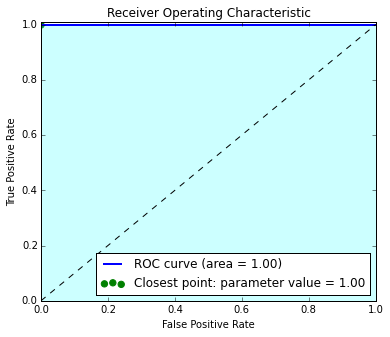

((0.0, 1.0), 1.0)

In [266]:
FeatureSelector = LinearSVC(C=1000, penalty="l1", dual=False)
Reduced = FeatureSelector.fit_transform(SupportData, SupportTargets )

FeatureSelector.predict( TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)

print("\n\n       Leukemia predictions restricted to \n       those genes identified by FeatureSelector ") 
ROCplot(fpr, tpr, True, threshholds)

In [267]:
Reduced.shape

(36, 48)

**Question 6:** What does this final ROC plot show -- be specific, and talk about genes! 

Correspondingly, support vector machines are often used as a preprocessing step for **<i>dimensionality reduction</i>** by first choosing only those features that are most likely to contribute to the classifier.  

In fact, we have avoided neural networks to this point with the leukemia data because the memory and processing requirements are beyond what a free Wakari account can handle.  However, if we use feature selection to reduce the dimensionality of the data, then this is no longer such a big issue.  

In [268]:
FeatureSelector = LinearSVC(C=1000, penalty="l1", dual=False)
Reduced = FeatureSelector.fit_transform(StandardizedLeukemiaData[:,1:], StandardizedLeukemiaData[:,0] )

In [269]:
TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(Reduced,StandardizedLeukemiaData[:,0], test_size = 0.2 )

NumTrain, NumberOfGenes = TrainingPatterns.shape
NumTest , NumberOfGenes =  TestingPatterns.shape
NumberOfGenes

118

In [272]:
ANN = neurolab.net.newff([[-10,10] for i in range(TrainingPatterns.shape[1])], [TrainingPatterns.shape[1],TrainingPatterns.shape[1], 1])
ANN.trainf = neurolab.train.train_cg
ANN.init()
err = []


The goal of learning is reached


0.0090378018607601817

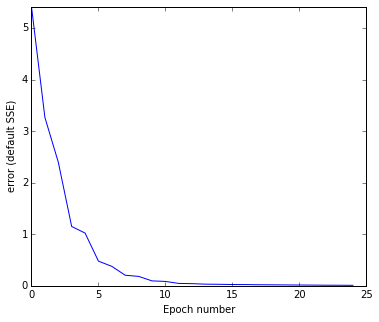

In [273]:
err.extend( ANN.train(TrainingPatterns, TrainingTargets.reshape( (len(TrainingTargets),1) ), show = 50, epochs = 1000 ) )

plot(err)
ylim(0,max(err))
xlabel('Epoch number')
ylabel('error (default SSE)')
err[-1]

You should notice that the Neural Network converges faster with the dimensionality-reduced data. 

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


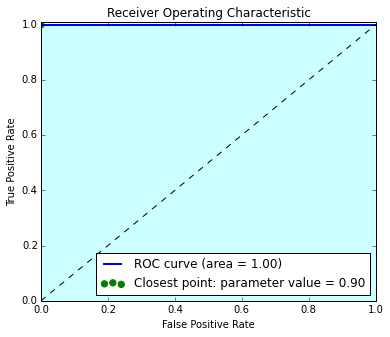

((0.0, 1.0), 0.89644619671207904)

In [274]:
Predictions = ANN.sim(TestingPatterns)

fpr, tpr, threshholds = roc_curve(TestingTargets, Predictions)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

## Digits Recognition

Neural networks were -- and often still are -- at the forefront of handwriting and speech recognition.  In particular, neural networks are natural for multiclass data, which means that in practice an output can be assigned to each letter, word, phrase, and so on. 

However, there are better algorithms today, which we now explore. 

We are going to explore a simple such application -- that of recognizing hand-written digits 0,...,9.  The data is built into <b>sklearn</b>, but it comes from several thousand samples of hand written digits as recorded in 32 x 32 bit images.  

For dimensionality reduction purposes, the 32x32 images are reduced to 8x8 matrices whose coefficients are the total number of "on" pixels in the corresponding 4x4 block.  

In [275]:
from sklearn.datasets import load_digits
digits = load_digits()

In [290]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Let's explore the data!  

In [285]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

2

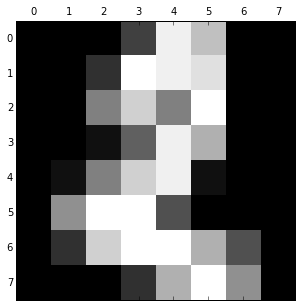

In [288]:
gray()
matshow( digits.images[2] )
digits.target[2]

8

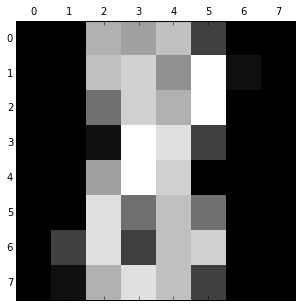

In [291]:
gray()
matshow( digits.images[40] )
digits.target[40]

First, we divide the data into testing and training sets: 

In [292]:
TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(digits.data,digits.target, test_size = 0.2 )

Now, let's train a Support Vector Machine to recognize digits: 

In [316]:
DigitsClassifier = KNeighborsClassifier(n_neighbors=15)

DigitsClassifier.fit( TrainingPatterns, TrainingTargets)

Predictions = DigitsClassifier.predict( TestingPatterns )


But how do we know how well we've done?  We can in fact produce an entire report for the classifier.  To do so, we use additional procedures in the **metrics** module.

In [317]:
print(metrics.classification_report(TestingTargets, Predictions)) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.95      0.98      0.97        43
          2       1.00      0.97      0.99        36
          3       1.00      0.97      0.99        38
          4       1.00      0.96      0.98        48
          5       0.93      0.93      0.93        30
          6       0.98      1.00      0.99        40
          7       0.94      1.00      0.97        31
          8       0.96      0.90      0.93        29
          9       0.91      0.97      0.94        32

avg / total       0.97      0.97      0.97       360



In [318]:
metrics.adjusted_mutual_info_score(TestingTargets,Predictions)

0.93976467429258304

Let's try it out.  Execute the next cell and Enter a digit.  

* __START WITH THE SHIFT KEY DOWN (Shift key toggles between black and white)__

* __Be sure to make the digit extend from the top of the square to the bottom (but not necessary on the sides)__

* __Make sure you have good, solid lines!__

In [319]:
EnterADigit()

Now run the cells below to see if the Support Vector Machine can read your writing!! 

In [320]:
ReducedData = ReduceDimensionality(DigitOutputArray)

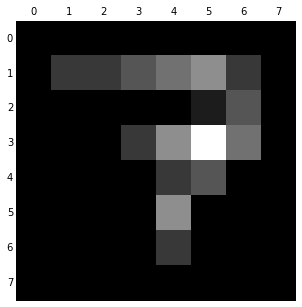

In [321]:
gray()
matshow(ReducedData)

In [322]:
"Prediction(s)", DigitsClassifier.predict( ReducedData.flatten() )

('Prediction(s)', array([7]))

The last cell contains the digit it thinks you wrote.  Was it right? 

**Question 7:** Convert this digits example to a *k* Nearest Neighbor approach. Is the result better or worse than a support vector machine? 

## Generalized XOR

Finally, let's look at another example -- the generalized XOR.   If **x** is a vector of length *n* containing only 1s and 0s, then we say it is in class 

sum(**x**) mod 2

That is, we sum the coefficients modulo 2, thus producing either class 0 or class 1. This generalizes the ordinary XOR. 

Below, we use a neural network to implement the generalized **XORdata** given its **XORtarget**. 

**Note:** The word *implement* means that we use all the data as the training set and see how well we can *implement* the pattern in the data into a neural network. 

In [329]:
ANN = neurolab.net.newff([[0,1] for i in range(5)], [5, 20, 1])
ANN.trainf = neurolab.train.train_cg
ANN.init()
err = []

8.0

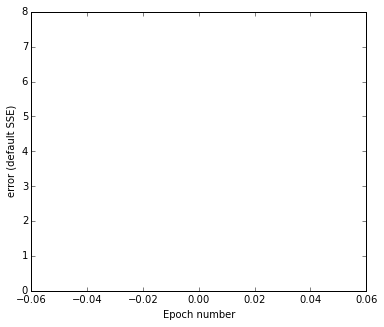

In [330]:
err.extend( ANN.train(XORdata, XORtarget.reshape( (len(XORtarget),1) ), show = 50, epochs = 1000 ) )

plot(err)
ylim(0,max(err))
xlabel('Epoch number')
ylabel('error (default SSE)')
err[-1]

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


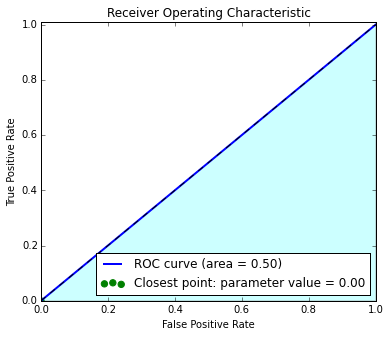

((0, 0), 0)

In [331]:
Predictions = ANN.sim(XORdata)

fpr, tpr, threshholds = roc_curve(XORtarget, Predictions)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

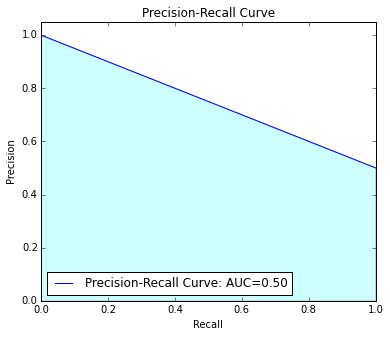

In [332]:
precision, recall, threshold = precision_recall_curve(XORtarget, Predictions)
PRCplot(recall, precision, auc=True)

**Question 8:** How well does Logistic Regression handle the generalized XOR?  __Set up__ a Logistic Classifier that (attempts) to implement the generalized XOR (no testing set -- everything is training) and indicate how well it does using metrics.  

In [351]:
log_model = LogisticRegression()

In [479]:
log_model.fit( XORdata, XORtarget)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [480]:
Pred = log_model.predict( XORdata )

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


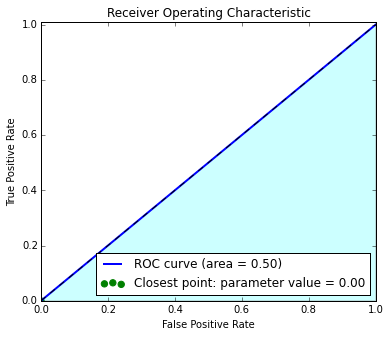

((0, 0), 0)

In [481]:
fpr, tpr, threshholds = roc_curve(XORtarget, Pred)
auc( fpr, tpr)

ROCplot(fpr, tpr, True, threshholds)

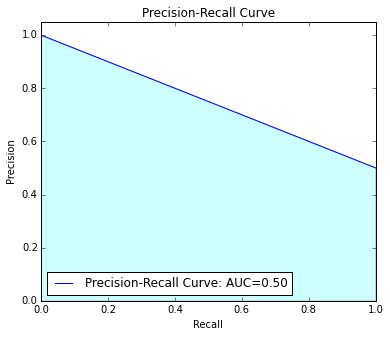

In [369]:
precision, recall, threshold = precision_recall_curve(XORtarget, pred)
PRCplot(recall, precision, auc=True)

In [370]:
print(metrics.accuracy_score(XORtarget, Pred)) 

0.5


Accuracy score was  50% , when we implement the generalized XOR , with no testing sets where everything is training set ; the Logistic Regression does not do well, just about the same accuracy as the neural network implementation of the XOR .

## Higgs Boson Data

The next data set is 2500 lines of data that physicists at the Large Hadron Collider (LHC) used to develop methods for detecting if a Higgs Boson was present in a collision.  It is simulated data, but the actual Higgs events are very close to the simulated Higgs events in this data.  (__NOTE:__ This is data set after I imputed missing values)

In [371]:
HiggsData = read_csv('HiggsTrainingValsSample.csv')

HiggsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 33 columns):
EventId                        2500 non-null float64
DER_mass_MMC                   2500 non-null float64
DER_mass_transverse_met_lep    2500 non-null float64
DER_mass_vis                   2500 non-null float64
DER_pt_h                       2500 non-null float64
DER_deltaeta_jet_jet           2500 non-null float64
DER_mass_jet_jet               2500 non-null float64
DER_prodeta_jet_jet            2500 non-null float64
DER_deltar_tau_lep             2500 non-null float64
DER_pt_tot                     2500 non-null float64
DER_sum_pt                     2500 non-null float64
DER_pt_ratio_lep_tau           2500 non-null float64
DER_met_phi_centrality         2500 non-null float64
DER_lep_eta_centrality         2500 non-null float64
PRI_tau_pt                     2500 non-null float64
PRI_tau_eta                    2500 non-null float64
PRI_tau_phi                    2500 non-null 

In [462]:
HiggsData.head(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.0,51.70,97.8,28.0,0.91,125,2.67,3.06,41.900,...,2,67.4,2.150,0.444,46.1,1.24,-2.48,113.0,0.00265,0
1,100000,90.8,27.80,65.4,56.0,-999.00,-999,-999.00,2.46,20.600,...,1,62.8,0.778,-2.210,-999.0,-999.00,-999.00,62.8,1.45000,1
2,100000,107.0,1.94,70.4,54.6,-999.00,-999,-999.00,2.08,30.400,...,1,66.6,-0.359,-0.485,-999.0,-999.00,-999.00,66.6,0.01860,0
3,100000,148.0,43.30,119.0,30.8,-999.00,-999,-999.00,2.92,30.800,...,0,-999.0,-999.000,-999.000,-999.0,-999.00,-999.00,0.0,1.21000,1
4,100000,133.0,7.57,88.3,35.5,-999.00,-999,-999.00,3.02,0.618,...,1,34.9,0.404,3.060,-999.0,-999.00,-999.00,34.9,0.00150,0


The target is the __Label__,  which is 1 if there is a Higgs boson in the simulated LHC collision event, and a 0 if there is no Higgs in the simulation.  

In [372]:
HiggsData.Label.head()

0    0
1    1
2    0
3    1
4    0
Name: Label, dtype: float64

This is admittedly a development set.  The original data is over 100 megabytes (about 100 times larger), much too large to use as a pandas __DataFrame__.  However, you could use the data as a matrix -- the __HiggsMatrix__ contains this (execute next cell). 

In [380]:
HiggsMatrix = HiggsData.as_matrix()
HiggsMatrix

array([[  1.00000000e+05,   1.38000000e+02,   5.17000000e+01, ...,
          1.13000000e+02,   2.65000000e-03,   0.00000000e+00],
       [  1.00000000e+05,   9.08000000e+01,   2.78000000e+01, ...,
          6.28000000e+01,   1.45000000e+00,   1.00000000e+00],
       [  1.00000000e+05,   1.07000000e+02,   1.94000000e+00, ...,
          6.66000000e+01,   1.86000000e-02,   0.00000000e+00],
       ..., 
       [  3.50000000e+05,  -9.99000000e+02,   7.86000000e+01, ...,
          0.00000000e+00,   5.77000000e+00,   1.00000000e+00],
       [  3.50000000e+05,   9.78000000e+01,   7.07000000e+01, ...,
          1.06000000e+02,   2.17000000e+00,   1.00000000e+00],
       [  3.50000000e+05,   7.82000000e+01,   4.63000000e+01, ...,
          3.24000000e+01,   5.63000000e+00,   1.00000000e+00]])

**Question 9 - 10:** Apply at least 2 algorithms to the Higgs data -- one of which must be a random forest -- and use metrics and the AUC-ROC to tell me which of the two is the better approach for this data.  

## a) Random Forest

In [449]:
rand_forest_model = RandomForestClassifier(n_estimators=20,min_samples_split=2)

In [450]:
X = HiggsData.drop(['EventId','Label'],axis=1)
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.0,51.70,97.8,28.0,0.91,125,2.67,3.06,41.900,198.0,...,259,2,67.4,2.150,0.444,46.1,1.24,-2.48,113.0,0.00265
1,90.8,27.80,65.4,56.0,-999.00,-999,-999.00,2.46,20.600,139.0,...,219,1,62.8,0.778,-2.210,-999.0,-999.00,-999.00,62.8,1.45000
2,107.0,1.94,70.4,54.6,-999.00,-999,-999.00,2.08,30.400,151.0,...,290,1,66.6,-0.359,-0.485,-999.0,-999.00,-999.00,66.6,0.01860
3,148.0,43.30,119.0,30.8,-999.00,-999,-999.00,2.92,30.800,83.5,...,103,0,-999.0,-999.000,-999.000,-999.0,-999.00,-999.00,0.0,1.21000
4,133.0,7.57,88.3,35.5,-999.00,-999,-999.00,3.02,0.618,116.0,...,140,1,34.9,0.404,3.060,-999.0,-999.00,-999.00,34.9,0.00150


In [451]:
TrainingPatterns, TestingPatterns, TrainingTargets, TestingTargets = \
train_test_split(X, HiggsData.Label, test_size = 0.2 )

In [463]:
rand_forest_model.fit( TrainingPatterns, TrainingTargets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [464]:
Pred_forest = rand_forest_model.predict( TestingPatterns )

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


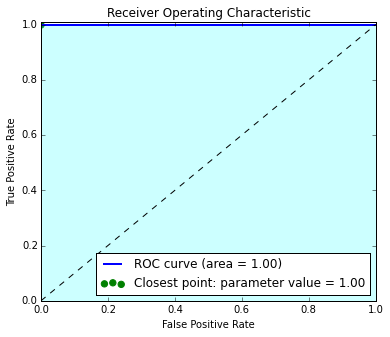

((0.0, 1.0), 1.0)

In [453]:
fpr, tpr, threshholds = roc_curve(TestingTargets, Pred_forest)

ROCplot(fpr, tpr, True, threshholds)

In [454]:
print metrics.accuracy_score(TestingTargets,Pred_forest)

1.0


In [472]:
metrics.adjusted_mutual_info_score(TestingTargets,Pred_forest)

1.0

In [471]:
print(metrics.classification_report(TestingTargets, Pred_forest)) 

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       165
        1.0       1.00      1.00      1.00       335

avg / total       1.00      1.00      1.00       500



In [465]:
print ('Random Forest Complete! You Rock! Finals Ready to be Submitted to Dr. Jeff Knisley ')

Random Forest Complete! You Rock! Finals Ready to be Submitted to Dr. Jeff Knisley 


## b) Support Vector Machines

In [455]:
svc_model = SVC(C = 1.0,kernel = 'rbf',gamma = 0.7)

In [457]:
svc_model.fit( TrainingPatterns, TrainingTargets)

Pred_svc = svc_model.predict( TestingPatterns )

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


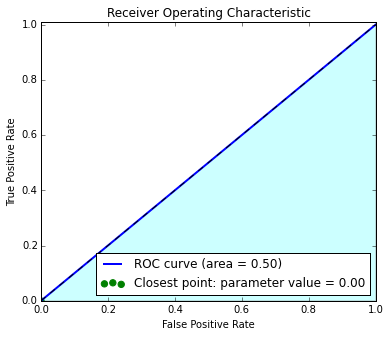

((0, 0), 0)

In [435]:
fpr, tpr, threshholds = roc_curve(TestingTargets, Pred_svc)

ROCplot(fpr, tpr, True, threshholds)

In [458]:
print metrics.accuracy_score(TestingTargets,Pred_svc)

0.67


In [474]:
print metrics.adjusted_mutual_info_score(TestingTargets,Pred_svc)

-4.3766178885e-16


In [470]:
print(metrics.classification_report(TestingTargets, Pred_svc)) 

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       165
        1.0       0.67      1.00      0.80       335

avg / total       0.45      0.67      0.54       500



## c) Logistic Regression

In [459]:
lg_model = LogisticRegression(C=1000, penalty='l1',dual=False)

In [467]:
lg_model.fit( TrainingPatterns, TrainingTargets)

Pred_lg = lg_model.predict( TestingPatterns )

/Users/theophilus/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:524: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


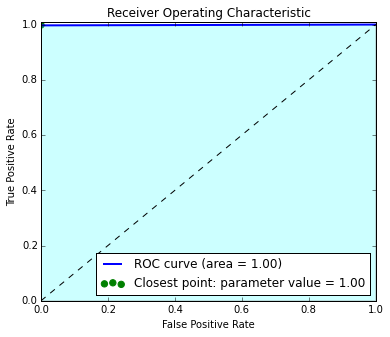

((0.0, 0.9970149253731343), 1.0)

In [461]:
fpr, tpr, threshholds = roc_curve(TestingTargets, Pred_lg)

ROCplot(fpr, tpr, True, threshholds)

In [418]:
print metrics.accuracy_score(TestingTargets,Pred_lg)

0.964


In [475]:
print metrics.adjusted_mutual_info_score(TestingTargets,Pred_lg)

0.978528740804


In [469]:
print(metrics.classification_report(TestingTargets, Pred_lg)) 

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       165
        1.0       1.00      1.00      1.00       335

avg / total       1.00      1.00      1.00       500



All in all , Random Forest approach was the best as compared to Support Vector Machine and Logistic Regression.
Support vector machines approach was the worst among this 3 approaches.Random forest is a highly versatile machine learning method with numerous applications ranging from marketing to healthcare and insurance. It can be used to model the impact of marketing on customer acquisition, retention, and churn or to predict disease risk and susceptibility in patients.It can handle a large number of features, and it's helpful for estimating which or your variables are important in the underlying data being modeled unlike SVM where if the number of features becomes very large, the model fails to perfom. The Random forest produced an accuracy score of 1.0 and AUC = 1.0 , SVM with accuracy score of 0.67 and AUC = 0.50  and Logistic Regression with an accuracy score of 0.964 and AUC = 1.0.

Once you've answered these 10 questions, save your work, download this notebooks, and then upload to D2L (elearn.etsu.edu).  

__BONUS:__  An automatic "A" for the course if you can develop a classifier for the Midterm Problem based on the MovieLens data that validates 5 times with an AUC over 0.92 (i.e., if the classifier gets an "A", you do to!!)